In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
import json
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

wine = load_wine()
wine.target[[10, 80, 140]]

list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [180]:
wine_df = pd.DataFrame(wine.data , columns= wine.feature_names)

wine_df['target'] =  wine.target

The real classes of the wines

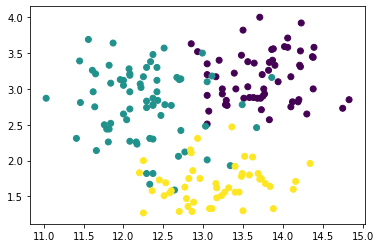

In [50]:
plt.scatter(wine_df['alcohol'] , wine_df['od280/od315_of_diluted_wines'] , c = wine_df['target'])
plt.show()

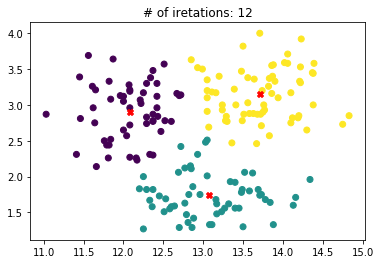

In [167]:
kmean = KMeans(n_clusters= 3, init = 'random' ).fit(wine_df[['alcohol', 'od280/od315_of_diluted_wines']])
plt.scatter(wine_df['alcohol'] , wine_df['od280/od315_of_diluted_wines'] , c = kmean.labels_)
plt.scatter( kmean.cluster_centers_[: , 0], kmean.cluster_centers_[: , 1] , marker='X' , c = 'r')
plt.title(label = '# of iretations: {}'.format(kmean.n_iter_ ) ,loc='center')
plt.show()

We can see after choosing approximate points of initializations it would be faster to do the clustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


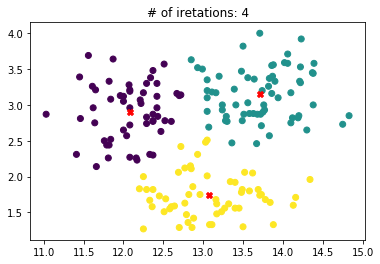

In [168]:
kmean = KMeans(n_clusters= 3, init = np.array([[12,3] ,[13,3] ,[13,1.7]]) ).fit(wine_df[['alcohol', 'od280/od315_of_diluted_wines']])
plt.scatter(wine_df['alcohol'] , wine_df['od280/od315_of_diluted_wines'] , c = kmean.labels_)
plt.scatter( kmean.cluster_centers_[: , 0], kmean.cluster_centers_[: , 1] , marker='X' , c = 'r')
plt.title(label = '# of iretations: {}'.format(kmean.n_iter_ ) ,loc='center')
plt.show()

## We can easily show how random initialization can effect on the number of iteration and the cost increases

In [178]:
for k in range(12):
    kmean = KMeans(n_clusters= 3, init = 'random' ).fit(wine_df[['alcohol', 'od280/od315_of_diluted_wines']])
    print('# of iretations: {}'.format(kmean.n_iter_ ) , 'And inertia: {}'.format(kmean.inertia_))

# of iretations: 7 And inertia: 58.32594553894382
# of iretations: 10 And inertia: 58.32594553894382
# of iretations: 9 And inertia: 58.32594553894382
# of iretations: 10 And inertia: 58.32594553894382
# of iretations: 8 And inertia: 58.32594553894382
# of iretations: 8 And inertia: 58.32594553894382
# of iretations: 8 And inertia: 58.32594553894382
# of iretations: 6 And inertia: 58.32594553894382
# of iretations: 12 And inertia: 58.32594553894382
# of iretations: 8 And inertia: 58.32594553894382
# of iretations: 6 And inertia: 58.32594553894382
# of iretations: 4 And inertia: 58.32594553894382
